### КУРС ПРОФЕССИОНАЛЬНОЙ ПЕРЕПОДГОТОВКИ
### Специализация: «МАШИННОЕ ОБУЧЕНИЕ И АНАЛИЗ ДАННЫХ»

https://datasciencecourse.ru

### Финальный проект

#### Тема проекта: Прогнозирование оттока клиентов
#### Автор: Бородастов Михаил Дмитриевич

#### 1. Цели и задачи проекта

#### Задача проекта:

Задача прогнозирования оттока клиентов - это:
- задача обучения с учителем (обучение по прецедентам)
- задача бинарной классификации

Задча приведена на сайте kaggle -
https://www.kaggle.com/c/telecom-clients-prediction2/overview 

В задаче необходимо спрогнозировать клиентов телеком оператора, склонных к оттоку.

#### Формальная постановка задачи:

Дано:

- обучающая выборка (X_train) из 40 000 объектов (клиенты телеком оператора)
- ответы на объектах из обучающей выборки y_train (метки классов - 'отток' и 'не отток')
- тестовая выборка (X_test) из 10 000 объектов
- каждый объект представлен в виде вектора из 230 признаков

Необходимо: 

- построить модель машинного обучения (алгоритм), которая наилучшим образом предсказывает ответы на объектах из обучающей выборки (этап обучения модели)


- использовать построенную модель для получения предсказаний на тествовой выборке так (этап тестирования (валидации) модели)


- при этом, качество модели и качество предсказаний оценивается по метрике roc_auc (площадь под ROC-кривой)

#### Цель проекта:

Применить на практике знания, полученные в рамках пройденной специализации, для каждой стадии машинного обучения при построении модели:

Стадии:

1) Описательный анализ данных

(первичный анализ данных - типы данных, доли классов, корреляции, определение наиболее важных признаков, визуализация распределения объектов в разрезе признаков)

2) Подготовка данных для построения модели 

(обработка пропусков, работа с категориальными признаками, выбор метрик для оценки качества (основной и дополнительных), разделение тренировочных данных на обучение и тест, выбор оптимальной стратегии проведения кросс-валидации)

3) Построение baseline-моделей и выбор оптимальной 

(определение наилучшего класса моделей машинного обучения для решения поставленной задачи)

4) Оптимизация модели 

(балансировка выборки (отбор объектов), отбор признаков, подбор оптимальных параметров модели)

5) Построение финального прогноза

6) Оценка потенциального эффекта от внедрения полученного решения

#### Итог (применение на практике):

Применив полученную модель на практике, можно определять клиентов, которые, с наибольшей вероятностью могут уйти от мобильного оператора. Для таких клиентов можно проводить специальные акции, направленные на увеличение лояльности к текущему мобильному оператору и пытаться сохранить данных клиентов в числе пользователей.


#### 2. Методика измерения качества и критерий успеха

#### Выбор основной и дополнительных метрик

1) Ввиду того, что мы работаем с сильно несбалансированной выборкой:

- обучающая выборка содержит только 7% объектов, относящихся к классу "отток"

нам необходимо учитывать разную цену ошибок (некорректно использовать метрику accuracy - долю правильный ответов), следовательно:

- мы должны использовать метрику на основе Precision и Recall

т.к. задача заключается в определении людей склонных к оттоку, то очевидно, что ложные пропуски (False Negative) для нас имеют гораздо большую цену, чем ложные срабатывания (False Positive). За ложные пропуски отвечает Recall (полнота)

В качестве вспомогательных метрик будем использовать: <b> Recall,F-меру </b>

2) Мы хотим настраивать порог срабатывания классификатора и иметь возможность более гибко настраивать нашу модель

Для учета качества оценки принадлежности объектов к тому или иному классу мы должны использовать ROC или PR кривые и находить площадь под ними.

В данном случае, исходя из того, что выборка у нас несимметричная относительно распределения классов, то предпочтительней ориентироваться и настраивать наш алгоритм на метрику - площадь под ROC-кривой, которая не чувствительна к изменению баланса классов.

В качестве основной метрики используем - <b> roc_auc (площадь под ROC-кривой) </b>

#### Основной критерий успеха:

Результатом выполнения данной работы является - прогноз для объектов из тестовой выборки, представляющий собой вероятности отнесения объекта к классу "отток", который должен быть загружен на сайт kaggle, где производится расчет достигнутого значения метрики roc_auc.

По ссылке ниже приводится рейтинг с загруженныи решениями.

https://www.kaggle.com/c/telecom-clients-prediction2/leaderboard

Чем выше позиция в рейтинге, тем более качественная модель построена и тем выше предсказательная способность модели.

####  3. Построение модели
#### 3.1 Техническое описание решения 

1) Для обучения использовали все данные из тренировочного датасета 40 000 объектов (orange_small_churn_data.train.csv)

2) В качестве hold_out выборки данные из тестовой выборки - 10 000 объектов (orange_small_churn_test_data.csv)

3) Удалили признаки, полностью состоящие из пропусков (230 - 18 признаков = 212)

4) Пропуски для катег-ых признаков заменяли <b>отдельной категорией</b>, для вещественных - <b>средними значениями</b>

5) Категориальные признаки кодировали <b>'частотным методом'</b> (частота вхождения каждой подкатегории для соответствующего признака)

6) Отбор объектов с помощью метода <b>ALLKNN</b> из библиотеки imblearn.under_sampling с параметром kind_sel='mode' (удалили 3024 объекта из 40 000)

7) Отбор признаков с помощью <b>ExtraTreesClassifier</b> из sklearn.ensemble с параметрами по умолчанию (Отобрали 82 признака, для которых получили максимальное значение качества по метрике roc_auc с XGBClassifier)

8) В качестве основного классификатора выбрали <b>XGBClassifier</b> из xgboost (реализация стохастического градиентного бустинга)

9) обучали по кросс-валидации на 5 фолдов по методу <b>StratifiedKFold</b> с shuffle=True

- Необходимость стратификации (Stratified)

Т.к. распределение классов сильно несбалансированно, то мы должны исключить возможность сценария, когда при разбиении на фолды, у нас окажется блок, в который объекты одного из классов не попадут вовсе.

- Необходимость перемешивания (shuffle=True)

Мы не знаем по какому принципу представлены исходные данные,  есть вероятность, что они могут быть отсортированы в соответствии с каким-то порядком , например разные по своей природе объекты идут группами друг за другом, по этому, чтобы снизить вероятность, что наша модель, на одном из разбиений может получить выборку состоящую из объектов, которые попадут только на обучение, но будут полностью отсутствовать в тесте или наоборот, мы должны перемешивать данные.

10) С помощью <b>RandomizedSearchCV и GridSearchCV</b> подобрали оптимальные параметры классификатора

#### 3.2 Построение baseline модели:

#### Импортирование библиотек

In [148]:
import pandas as pd
import scipy.stats
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV,\
StratifiedShuffleSplit,learning_curve
from sklearn.feature_extraction import DictVectorizer , FeatureHasher
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, ExtraTreesClassifier

from sklearn.metrics import precision_recall_curve, precision_score, recall_score ,\
plot_precision_recall_curve, roc_auc_score,roc_curve, f1_score,auc

import xgboost as xgb

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier , XGBRFClassifier
from imblearn.under_sampling import AllKNN,TomekLinks,NearMiss
from sklearn.feature_selection import VarianceThreshold

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

В работе будем использовать два набора данных:

1. data_merge - тренировчный набор данных из 40 000 объектов.


- Разобьем его на train и hold_out.
- Будем обучать модель на train по кросс-валидации и оценивать финальное качество на hold_out


2. X_DATA - тренировочный набор данных из 40 000 объектов + 10 000 объектов из тестового набора.

В данной задаче финальнуй оценку качества мы должны проводить на тестовой выборке с сайта Kaggle, которая и будет hold-out dataset-ом для нас, следовательно мы можем использовать больше данных для обучения на кросс-валидации. (40000 - обучение, 10000 - hold-out для валидации)

Финальное решение будем строить по выборке X_DATA

#### работа с data_merge выборкой

In [149]:
#считывание данных
X_train=pd.read_csv('orange_small_churn_data.train.csv')
y_train=pd.read_csv('orange_small_churn_labels.train.csv',header=None)

#установим имя для колонки с ответами
y_train=y_train.rename(columns={0:'labels'})

#объединим матрицу объектов-признаков и вектор целеых меток
data_merge=X_train
data_merge['labels']=y_train

#замена -1 класса на 0, для удобства восприятия
data_merge.labels=data_merge.labels.replace(-1,0)

real_features=list(data_merge.iloc[:,:190].columns.values) # числовые признаки
categ_features=list(data_merge.iloc[:,190:230].columns.values) #категориальные признаки

#убираем нулевые стоблы в категориальных признаках
categ_features_not_null=categ_features.copy()
categ_features_not_null.remove('Var209')
categ_features_not_null.remove('Var230')

#заполняем пустые значения категорией 'w/o_cat'
X_cat_filled=data_merge[categ_features_not_null].fillna('w/o_cat')

#определяем нулевые столбцы среди вещ признаков
null_real_features=data_merge[real_features].loc[:,data_merge[real_features].\
                                                 isnull().all().values].columns

#определяем ненулевые вещественные признаки
real_features_not_null=list(pd.core.indexes.base.Index(real_features).drop(null_real_features))

#заполняем пустые значения вещественных признаков средними значениями
X_real_mean=data_merge[real_features_not_null].apply(lambda x: x.fillna(x.mean()))


#### работа с X_DATA выборкой

In [8]:
X_train_orig=pd.read_csv('orange_small_churn_data.train.csv')
y_train_orig=pd.read_csv('orange_small_churn_labels.train.csv',header=None)
X_test_orig=pd.read_csv('orange_small_churn_test_data.csv', index_col='ID')

#переименуем колонку с целевыми метками
y_train_orig=y_train_orig.rename(columns={0:'labels'})

#замена -1 класса на 0, для удобства восприятия
y_train_orig.labels=y_train_orig.labels.replace(-1,0)

X_DATA=pd.concat([X_train_orig,X_test_orig], axis=0,join='outer',ignore_index=True)

real_features=list(X_DATA.iloc[:,:190].columns.values) # числовые признаки
categ_features=list(X_DATA.iloc[:,190:230].columns.values) #категориальные признаки

# удаляем нулевые категориальные признаки + заполняем пропуски на 'w/o_cat'
categ_features_not_null=categ_features.copy()
categ_features_not_null.remove('Var209')
categ_features_not_null.remove('Var230')

#заполняем категориальные признаки категорией 'w/o_cat'
X_cat_filled=X_DATA[categ_features_not_null].fillna('w/o_cat')

#заполняем категориальные признаки наиболее частой категорией
X_cat_filled_2=X_DATA[categ_features_not_null].apply(lambda x: x.fillna(x.value_counts().index[0]))


#### определение функций , используемых при построении модели

In [152]:
#функция расчета коэф. Краммера, p_value, корректность использования статистики Хи-2
def V_Krammer_func(table):

    chi2, p_value, n_dof, expected_values= chi2_stat=scipy.stats.chi2_contingency(table)
    n=table.sum().sum()
    min_from_shape=min(table.shape[0],table.shape[1])
    V_Krammer=np.sqrt(chi2/(n*(min_from_shape-1)))
    number_of_cells_less_five=len(expected_values[expected_values<5])
    cells_share=number_of_cells_less_five/(expected_values.shape[0]*expected_values.shape[1])*100

    if cells_share<=20 and n>=40:
        condition_of_using="Ok"
    else:
        condition_of_using='Not allowed'
        
    return V_Krammer, p_value, condition_of_using

#функция расчета корреляции между вещественными и категориальными признаками
def corr_for_real_and_y(X,y):
    X_and_y=pd.concat([X,y],axis=1)
    CORR_X_y=X.groupby(y).agg(lambda x: x.mean())
    CORR_X_y.loc["diff"]=CORR_X_y.apply(lambda x: x[1]-x[0])
    CORR_DIFF=CORR_X_y.loc['diff'].to_frame()
    CORR_DIFF['Corr_sign']=['+' if diff>=0 else '-' for diff in CORR_DIFF['diff']]
    CORR_DIFF['diff']=CORR_DIFF['diff'].apply(abs)
    CORR_DIFF=CORR_DIFF.sort_values('diff',ascending=False)
    return CORR_DIFF

# удаляем нулевые числовые признаки в зависимости от порога, который определяет допустимую долю
# пропусков(nan-значений) для каждого признака + заполняем пропуски средними значениями

def get_X_real_mean(X,share):
    DF_with_indexes=pd.DataFrame((X.iloc[:40000,:190].isnull().sum()/\
                                  X.iloc[:40000,:190].shape[0]), columns=['n_null'])\
                                .sort_values('n_null',ascending=False)

    real_features_not_null=DF_with_indexes[DF_with_indexes['n_null']<share].index

    X_real_mean=X[real_features_not_null].apply(lambda x: x.fillna(x.mean()))
    return X_real_mean

#Определим функцию, которая в зависимости от заданного порога, будет отбирать вещественные
#признаки по степени корреляции (елси порог равен 0, то используем все вещественные признаки, 
# если увеличиваем порог, то признаки, которые почти никак не коррелируют с целевой меткой 
#- удаляются из рассмторения)

#базовый вариант для случая, когда hold-out выборка отделяется от исходного датасета
def real_features(X_real,y,threshold=0):
    top_corr_=corr_for_real_and_y(X_real,y)
    if threshold:
        return X_real[top_corr_[top_corr_['diff'] >= threshold].index]
    else:
        return X_real
    

# вариант для случая, когда hold-out берется с kaggle для построения прогноза
def real_features_new(X_real,y,threshold=0):
    
    splitter=X_real.shape[0]-10000
    
    top_corr_=corr_for_real_and_y(X_real.iloc[0:splitter,],y)
    if threshold:
        return X_real[top_corr_[top_corr_['diff'] >= threshold].index]
    else:
        return X_real
    
#Определим функцию, которая в зависимости от заданного порога, будет отбирать вещественные признаки
#по степени корреляции, и в зависимости от переданного DF с категориальными признаками, будем делать
#соовтетствующее разделение на hold-out и train выборки.  


#базовый вариант для случая, когда hold-out выборка отделяется от исходного датасета
def hold_out_train(X_real, X_cat, y, real_threshold=0):
    
    X_real_=real_features(X_real,y,real_threshold)
    
    X=pd.concat([X_real_,X_cat],axis=1)
    
    DATA=pd.concat([X,y],axis=1)

    strat = StratifiedShuffleSplit(n_splits=1,test_size=0.20, random_state=0)
    train_ind, test_ind = next(strat.split(X,y))
    
    train=DATA.iloc[train_ind,:]
    hold_out_dataset=DATA.iloc[test_ind,:]
    
    
    return train,hold_out_dataset

# вариант для случая, когда hold-out берется с kaggle для построения прогноза
def hold_out_train_new(X_real, X_cat, y, real_threshold=0, scaler=None):
    
    splitter=X_real.shape[0]-10000
    
    X_real_=real_features_new(X_real,y,real_threshold)
    
    if type(scaler)==type(None):
    
        X=pd.concat([X_real_,X_cat],axis=1)
        
        train=X.iloc[0:splitter]
        hold_out_dataset=X.iloc[splitter:,]
        
        return train,hold_out_dataset
    
    elif type(scaler)!=type(None):
        
        sclr=scaler
        X_real_train=sclr.fit_transform(X_real_.iloc[0:splitter,])
        X_real_hold_out=sclr.fit_transform(X_real_.iloc[splitter:,])
        X_real_merge=np.vstack((X_real_train,X_real_hold_out))
        X_real_=pd.DataFrame(X_real_merge,columns=X_real_.columns, index=X_real_.index)
        X=pd.concat([X_real_,X_cat],axis=1)
        train=X.iloc[0:splitter,]
        hold_out_dataset=X.iloc[splitter:,]
        
        return train,hold_out_dataset

#Определим функцию, которая будет кодировать категориальные признаки соответствующим образом
def cat_to_real_encode(X_cat, endocer_way):
    if endocer_way=='One-hot':
        X_cat_OH=pd.get_dummies(X_cat, dtype=float)
        return X_cat_OH
    elif endocer_way=='hash':
        n=X_cat.apply(lambda x: x.nunique()).sum()
        hasher=FeatureHasher(n_features=n)
        X_cat_hash=hasher.fit_transform(X_cat.T.to_dict().values()).toarray()
        X_cat_hash_DF=pd.DataFrame(X_cat_hash)
        return X_cat_hash_DF
    elif endocer_way=='freq':
        X_cat_FR=pd.DataFrame()
        for feature in X_cat.columns:
            X_cat_FR[feature]=X_cat[feature].map(X_cat.groupby(feature).size()/len(X_cat))
        return X_cat_FR
            
#оформим алгоритм получения оценок для соответствующих метрик в виде функции
def estimator(clf, X, y, X_hold_out=None, y_hold_out=None, n_folds=5,random=0,\
                                              print_graph='No',print_metrics='No'):
    
    stat = StratifiedKFold(n_splits=n_folds,shuffle=True,random_state=random)
    clf=clf
    
    Precision_list=[]
    Recall_list=[]
    auc_prc_list=[]
    f1_score_list=[]
    roc_auc_list=[]
    
    if print_graph=='Yes':
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

    for train_ind, test_ind in stat.split(X,y):
    
        X_train = X.iloc[train_ind,:]
        y_train = y.iloc[train_ind]
    
        X_test  = X.iloc[test_ind,:]
        y_test  = y.iloc[test_ind]
    
        clf.fit(X_train,y_train)
    
        y_pred=clf.predict(X_test)
        y_prob_to_1=clf.predict_proba(X_test)[:,1]
    
        #площаь под PR - кривой - основаня метрика определенная на прошлой неделе
        Precision_cor, Recall_cor, _ = precision_recall_curve(y_test,y_prob_to_1)
        auc_prc_list.append(auc(Recall_cor,Precision_cor))
    
        #площадь под ROC-кривой - основная метрика , по которой сравниваются решения на Kaggle
        roc_auc_list.append(roc_auc_score(y_test,y_prob_to_1))
    
        #вычисления дополнительных метрик
        Precision=precision_score(y_test,y_pred)
        Precision_list.append(Precision)
    
        Recall=recall_score(y_test,y_pred)
        Recall_list.append(Recall)
    
        f1_score_list.append(f1_score(y_test,y_pred))
        
        #построение PR и ROC кривых и печать дополнительных метрик:
        if print_graph=='Yes':
            
            #график PR - кривой
            plot_precision_recall_curve(clf,X_test,y_test, ax=axes[0])
            axes[0].set_title('Precision-Recall кривые для k-фолдов')
            axes[0].grid()

            #график ROC-кривой
            fpr, tpr, _ = roc_curve(y_test,y_prob_to_1)
            axes[1].plot(fpr,tpr)
            axes[1].plot([0, 1], [0, 1], color='navy', linestyle='--')
            axes[1].grid()
        
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('ROC-кривые') 
            
    #печать дополнительных метрик
    if print_metrics=='Yes':
        print ('Метрика auc_prc по кросс-валидации для {} фолдов - {}'.\
               format(n_folds,np.array(auc_prc_list).mean().round(4)))
        print ('Метрика Precision по кросс-валидации для {} фолдов - {}'.\
               format(n_folds,np.array(Precision_list).mean().round(4)))
        print ('Метрика Recall по кросс-валидации для {} фолдов - {}'.\
               format(n_folds,np.array(Recall_list).mean().round(4)))
        print ('Метрика f1-score по кросс-валидации для {} фолдов - {}'.\
               format(n_folds,np.array(f1_score_list).mean().round(4)))
        print ('\n')
            
    print ('{} - Метрика auc_roc по кросс-валидации для {} фолдов - {}'.\
           format(clf.__class__.__name__,n_folds,np.array(roc_auc_list).mean().round(4)))
    
    #оцениваем метрику на hold_out выборке, если ее передали в функцию в качестве аргумента
    if type(X_hold_out)!=type(None):
        
        
        clf=clf
        clf.fit(X,y)
        predictions=clf.predict_proba(X_hold_out)[:,1]
             
        roc_auc_score_hold_out=roc_auc_score(y_hold_out,predictions)
        print ('{} - Метрика auc_roc на hold_out выборке (финальная оценка) - {}'.\
               format(clf.__class__.__name__,roc_auc_score_hold_out.round(4)))
       
        return np.array(roc_auc_list).mean().round(4),  roc_auc_score_hold_out.round(4)
    
    return np.array(roc_auc_list).mean().round(4)

#Определим функцию, которая в зависимости от установленного порога будет строже или мягче
#конвертировать предсказанную вероятность в соответствуюзий класс, т.е. чем ниже порог, 
#тем с более низкими вероятностями наша модель будет относить объекты к классу 'отток'

def mistakes_balance_tuning(DF,threshold):
    DF.predicted_class=np.where(DF.predicted_prob>=threshold,1,0)
    
    DF_mistakes=DF[DF.predicted_class!=DF.true_class].\
            sort_values('predicted_prob',ascending=False)
    
    #mistakes matrix
    TP=DF[(DF.predicted_class==1)&(DF.true_class==1)]
    FP=DF_mistakes[DF_mistakes.predicted_class==1]
    TN=DF[(DF.predicted_class==0)&(DF.true_class==0)]
    FN=DF_mistakes[DF_mistakes.predicted_class==0]
    #Pr and Recall
    Precision=TP.shape[0]/(TP.shape[0]+FP.shape[0])
    Recall=TP.shape[0]/(TP.shape[0]+FN.shape[0])
    #Roc_Auc
    roc_auc=roc_auc_score(y_validation,DF.predicted_prob)
    
    print('TP (верно определенные клиенты из класса "отток") = ',TP.shape[0])
    print('FN (ложные пропуски клиентов из класса "отток") = ',FN.shape[0])
    print('FP (ложные срабатывания - неверное отнесение клиента к классу "отток") = ',FP.shape[0])
    print('Precision = ',round(Precision,3))
    print('Recall = ',round(Recall,3))
    print('roc_auc = ',round(roc_auc,3))
    print('общее число клиентов в валидационной выборке = ',DF.shape[0])
    
    return TP.shape[0],FN.shape[0],FP.shape[0], DF

#Перепишем, определенную ранее функцию, включив в нее параметры , 
#используемые для оценки экономической эффективности
def mistakes_balance_tuning_and_final_estimation(DF,threshold,
                            income_per_cust_mnth=100,
                            cost_to_hold_per_cust_mnth=10,
                            loyalty_to_suggestion=0.5,
                            top_customer_to_hold=0.25):
    
    DF.predicted_class=np.where(DF.predicted_prob>=threshold,1,0)
    
    DF_mistakes=DF[DF.predicted_class!=DF.true_class].sort_values('predicted_prob',ascending=False)
    
    #mistakes matrix
    TP=DF[(DF.predicted_class==1)&(DF.true_class==1)]
    FP=DF_mistakes[DF_mistakes.predicted_class==1]
    TN=DF[(DF.predicted_class==0)&(DF.true_class==0)]
    FN=DF_mistakes[DF_mistakes.predicted_class==0]
    #Pr and Recall
    Precision=TP.shape[0]/(TP.shape[0]+FP.shape[0])
    Recall=TP.shape[0]/(TP.shape[0]+FN.shape[0])
    #Roc_Auc
    roc_auc=roc_auc_score(y_validation,DF.predicted_prob)
    
    print('TP (верно определенные клиенты из класса "отток") = ',TP.shape[0])
    print('FN (ложные пропуски клиентов из класса "отток") = ',FN.shape[0])
    print('FP (ложные срабатывания - неверное отнесение клиента к классу "отток") = ',FP.shape[0])
    print('Precision = ',round(Precision,3))
    print('Recall = ',round(Recall,3))
    print('roc_auc = ',round(roc_auc,3))
    
    #общее число клиентов 8000
    customers_number=DF.shape[0]

    
    #реальный объем класса отток
    true_churn_numbers=DF[DF.true_class==1].shape[0]
    print('реальный объем класса отток ',true_churn_numbers)
    
    # класс отток, определяемый моделью
    predicted_churn_numbers=DF[DF.predicted_class==1].shape[0]
    print('класс отток, определяемый моделью ',predicted_churn_numbers)
    
    #определим % лучших от класса отток
    top_number=int(predicted_churn_numbers*top_customer_to_hold)
    print('% дучших от класса отток ' ,top_number)
    
    #DF c % лучших от класса отток
    
    DF_TOP=DF[DF.predicted_class==1].sort_values('predicted_prob',ascending=False).\
                                                                    iloc[:top_number,]
    
    # число людей действительно относящихся к классу отток из исследуемых Топ25% нашей модели
    true_churn_from_top_number=(DF_TOP.true_class==1).sum()
    print('число людей действительно относящихся к классу отток из исследуемых ',\
                                                              true_churn_from_top_number)
    
    #число людей, лояльных к предложению
    loyal_customer=round(true_churn_from_top_number*loyalty_to_suggestion)
    print('число людей, лояльных к предложению ',loyal_customer)
    
    #прибыль без модели
    income_wout_model=(customers_number-true_churn_numbers)*income_per_cust_mnth
    print('прибыль без модели = ',income_wout_model)

    #затраты на удержание
    cost_to_hold=top_number*cost_to_hold_per_cust_mnth
    print('затраты на удержание = ',cost_to_hold)
    
    #прибыль от сохраненных клиентов
    print('прибыль от сохраненных клиентов ',loyal_customer*income_per_cust_mnth)
    
    #прибыль с моделью
    income_with_model=(customers_number-(true_churn_numbers-loyal_customer))*\
                                                        income_per_cust_mnth-cost_to_hold            
    print('прибыль с моделью = ',income_with_model)
    
    #разница двух сценариев
    Difference_in_total_income_per_mnth=income_with_model-income_wout_model
    Difference_in_total_income_per_mnth
    
    print('разница в итоговой прибыли после применения модели ', \
              round(Difference_in_total_income_per_mnth/income_wout_model*100,2))

    return round(Difference_in_total_income_per_mnth/income_wout_model*100,3)

#### baseline-модель (data_merge датасет)

(40000, 38) 38 - категориальных признаков
(40000, 174) 174 - вещественных признаков
Метрика auc_prc по кросс-валидации для 5 фолдов - 0.2137
Метрика Precision по кросс-валидации для 5 фолдов - 0.5438
Метрика Recall по кросс-валидации для 5 фолдов - 0.008
Метрика f1-score по кросс-валидации для 5 фолдов - 0.0157


XGBClassifier - Метрика auc_roc по кросс-валидации для 5 фолдов - 0.7429
XGBClassifier - Метрика auc_roc на hold_out выборке (финальная оценка) - 0.7479
Wall time: 53.1 s


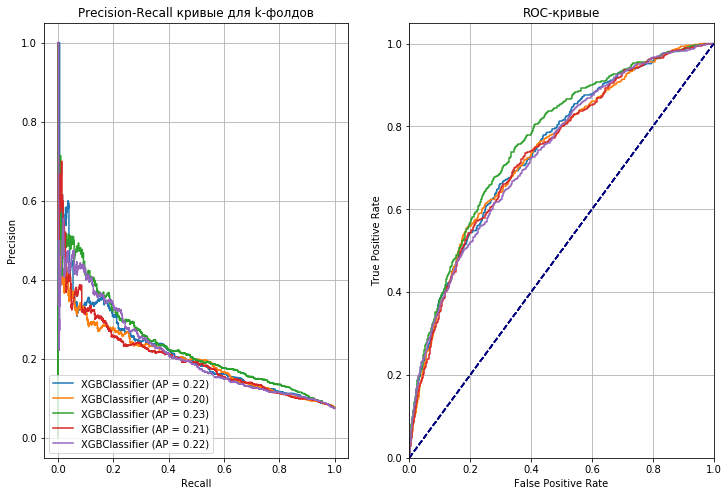

In [54]:
%%time
#заполнение пропоусков для категориальных признаков
X_cat_filled=data_merge[categ_features_not_null].fillna('w/o_cat')

#кодирование категориальных признаков
X_cat=cat_to_real_encode(X_cat_filled,'freq')
print(X_cat.shape,X_cat.shape[1],'- категориальных признаков')

#отбор вещественных признаков
X_real_mean=get_X_real_mean(data_merge.drop('labels',axis=1),1)
print(X_real_mean.shape,X_real_mean.shape[1],'- вещественных признаков')

#метки
y=y_train_orig.labels

TRAIN, HOLD = hold_out_train(X_real_mean,X_cat,y)

#тренировочный датасет разбиваем на матрицу объектов-признаков и вектор меток, данные используем непосредствеено в DF-ах
X=TRAIN.drop('labels',axis=1)
y=TRAIN['labels']

X_validation=HOLD.drop('labels',axis=1)
y_validation=HOLD['labels']

baseline_roc_auc_CV , baseline_roc_auc_HOLD = \
estimator(xgb.XGBClassifier(random_state=random),X,y,X_validation,y_validation,print_graph='Yes',print_metrics='Yes')

In [59]:
#для сравнения полученных результатов с качеством на baseline моделе
def baseline():
    print ("качество baseline модели : \nroc_auc на CV = {} \nroc_auc на hold_out = {}".\
           format(baseline_roc_auc_CV,baseline_roc_auc_HOLD))
baseline()

качество baseline модели : 
roc_auc на CV = 0.7429 
roc_auc на hold_out = 0.7479


#### baseline-модель (X_DATA датасет)

(50000, 38) 38 - категориальных признаков
(50000, 174) 174 - вещественных признаков
Метрика auc_prc по кросс-валидации для 5 фолдов - 0.223
Метрика Precision по кросс-валидации для 5 фолдов - 0.6258
Метрика Recall по кросс-валидации для 5 фолдов - 0.0118
Метрика f1-score по кросс-валидации для 5 фолдов - 0.0231


XGBClassifier - Метрика auc_roc по кросс-валидации для 5 фолдов - 0.7445
Wall time: 54.1 s


0.7445

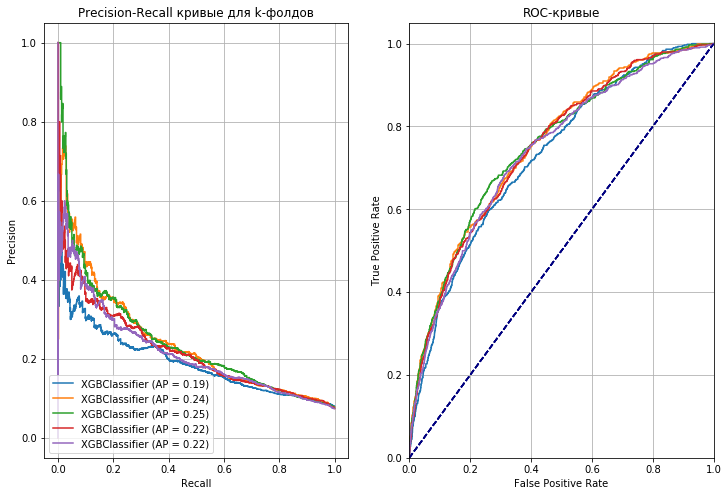

In [62]:
%%time
#заполнение пропоусков для категориальных признаков
X_cat_filled=X_DATA[categ_features_not_null].fillna('w/o_cat')

#кодирование категориальных признаков
X_cat=cat_to_real_encode(X_cat_filled,'freq')
print(X_cat.shape,X_cat.shape[1],'- категориальных признаков')

#отбор вещественных признаков (удаление нулевых)
X_real_mean=get_X_real_mean(X_DATA,1)
print(X_real_mean.shape,X_real_mean.shape[1],'- вещественных признаков')

#метки
y=y_train_orig.labels

X, HOLD = hold_out_train_new(X_real_mean,X_cat,y)

estimator(xgb.XGBClassifier(random_state=random),X,y,print_graph='Yes',print_metrics='Yes')

#### 3.3 Эксперименты с baseline моделью (оптимизация модели)

#### Undersampling

В ходе выполнения экспериментов с моделью были протестированы различные техники отбора объектов:

1) Балансировка путем перебора гиперпараметра scale_pos_weight для нашего классификатора.
- Балансировка исходного набора данных путем задания соответствующих поправочных коээфициентов для объектов меньшего класса (в нашем случае положительный класс - отток) ведет в общем к снижению уровня качества классификатора.

2) Random Undersampling
- Random Undersampling с уделением небольшой доли объектов большего класса приводит к увеличению качества как на кросс-валидации так и на отложенной выборке.

- Рандомное удаление объектов - довольно грубый способ, т.к. мы не учитываем важность объектов для обучения.

3) Методы из библиотеки imbalanced-learn:

а) ALLKNN
- Данный алгоритм позволяет поднять качество как на CV, так и на hold_out датасете, в сравнении с baseline моделью.

b) TomekLinks

- Данный алгоритм показывает более высокое качество на CV , но более низкое на hold_out датасете, в сравнении с baseline моделью.

- Наилучшие результаты показал метод 'auto'.

- Алгоритм со стратегией 'auto' находит пары объектов противоположного класса, расстояние между котороми очень мало (т.е. объекты схожей природы) и удаляет в таких парах объекты большего класса, при этом сохраняя объекты миноритарного класса.

с) NearMiss
 - Данный алгоритм позволяет поднять качество как на cv, так и на hold_out выборке, по сравнению с baseline моделью, при аккуртной подстройке количества отбираемых объектов.

Наилучшие результаты показал метод ALLKNN, ниже приведена его реализация.

#### Undersampling - AllKNN


(40000, 38) 38 - категориальных признаков
(40000, 174) 174 - вещественных признаков
(24894, 212)
(24894,)
XGBClassifier - Метрика auc_roc по кросс-валидации для 5 фолдов - 0.7498
XGBClassifier - Метрика auc_roc на hold_out выборке (финальная оценка) - 0.7492
(29532, 212)
(29532,)
XGBClassifier - Метрика auc_roc по кросс-валидации для 5 фолдов - 0.7455
XGBClassifier - Метрика auc_roc на hold_out выборке (финальная оценка) - 0.7493


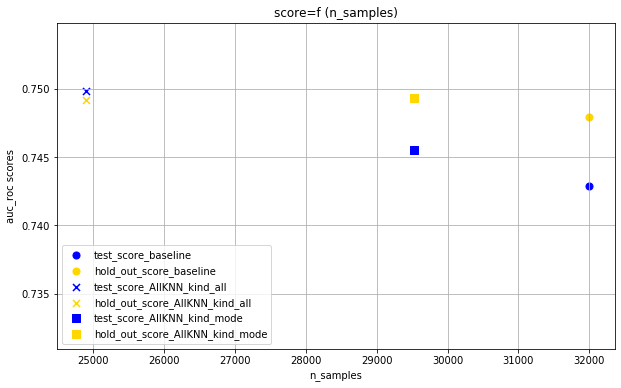

Wall time: 4min 53s


In [65]:
%%time
#кодирование категориальных признаков
X_cat_filled=data_merge[categ_features_not_null].fillna('w/o_cat')
X_cat=cat_to_real_encode(X_cat_filled,'freq')
print(X_cat.shape,X_cat.shape[1],'- категориальных признаков')
#отбор вещественных признаков
X_real_mean=get_X_real_mean(data_merge.drop('labels',axis=1),1)
print(X_real_mean.shape,X_real_mean.shape[1],'- вещественных признаков')
#метки
y=y_train_orig.labels

TRAIN, HOLD = hold_out_train(X_real_mean,X_cat,y)

#тренировочный датасет разбиваем на матрицу объектов-признаков и вектор меток, данные используем непосредствеено в DF-ах
X=TRAIN.drop('labels',axis=1)
y=TRAIN['labels']

X_validation=HOLD.drop('labels',axis=1)
y_validation=HOLD['labels']

#реализация различных видом ALLKNN
cv_scores_=[]
hold_out_scores_=[]
kinds=['all','mode']

for kind in kinds:

    allknn = AllKNN(kind_sel=kind)

    X_resampled, y_resampled = allknn.fit_resample(X, y)
    
    print(X_resampled.shape)
    print(y_resampled.shape)
    
    cv_score, hold_out_score = estimator(xgb.XGBClassifier(random_state=random),X_resampled,y_resampled,X_validation,y_validation)
    
    cv_scores_.append(cv_score)
    hold_out_scores_.append(hold_out_score)


#визуализация полученных результатов
plt.figure(figsize=(10,6))
plt.scatter(32000,baseline_roc_auc_CV,color='blue', s=50, marker='o')
plt.scatter(32000,baseline_roc_auc_HOLD,color='gold', s=50, marker='o')
plt.scatter(24894,cv_scores_[0],color='blue', s=50, marker='x')
plt.scatter(24894,hold_out_scores_[0],color='gold', s=50, marker='x')
plt.scatter(29532,cv_scores_[1],color='blue', s=50, marker='s')
plt.scatter(29532,hold_out_scores_[1],color='gold', s=50, marker='s')
plt.legend(['test_score_baseline','hold_out_score_baseline',
            'test_score_AllKNN_kind_all','hold_out_score_AllKNN_kind_all',
            'test_score_AllKNN_kind_mode','hold_out_score_AllKNN_kind_mode'])
plt.ylabel('auc_roc scores')
plt.xlabel('n_samples')
plt.title('score=f (n_samples)')
plt.grid()
plt.show()

In [66]:
print("изначальная доля меньшего класса, по отношению к большему: ",(y.value_counts()[1]/y.value_counts()[0]).round(3))
print("после отбора объектов доля меньшего класса, по отношению к большему (в случае kind_sel='mode'): ",(y_resampled.value_counts()[1]/y_resampled.value_counts()[0]).round(3))
print('количество отобранных объектов :',y.value_counts()[0]-y_resampled.value_counts()[0])

изначальная доля меньшего класса, по отношению к большему:  0.08
после отбора объектов доля меньшего класса, по отношению к большему (в случае kind_sel='mode'):  0.088
количество отобранных объектов : 2468


#### Анализ результатов Undersampling - AllKNN:
    
Данный алгоритм позволяет поднять качество как на CV, так и на hold_out датасете, в сравнении с baseline моделью.

В случае гиперапарметра kind_sel='mode' проводится более мягкий отбор, при котором, в датасете остаются все элементы большего класса, для которых большинство из n-ближайших соседей принадлежат к большему классу, а удаляются только те элементы, для которых большенство соседей принадлежит меньшему классу.

В случае гиперапарметра kind_sel='all' проводится более жесткий отбор, при котором, в датасете остаются только те элементы большего класса, для которых все n-ближайших соседей принадлежат к большему классу, а удаляются любые элементы, для которых хотя бы 1 из соседей принадлежит к меньшему классу.

Мягкий отбор выглядит более предпочтительным, т.к. мы удаляем небольшое количество данных, и как следствие теряем меньше информации. К тому же, при мягком отборе качество на отложенной выборке выше аналогичного качества для жесткого отбора.

#### Работа с признаками - Заполнение пропусков.

Пробовались различные стратегии заполнения пропусков:
    
Для вещественных признаков - заполнение средними значениями и заполнение нулями.

Для категориальных признаков - заполнение отдельной новой категорией и заполнение наиболее частой категорией.

Наилучший результат показал метод - используемый в baseline моделях.

- вещесвтенные - средними значениями
- категориальные - новой категорией

Ниже приведен скриншот с результатами без непосредственной реализации экспериментов для того, чтобы не перегружать отчет.

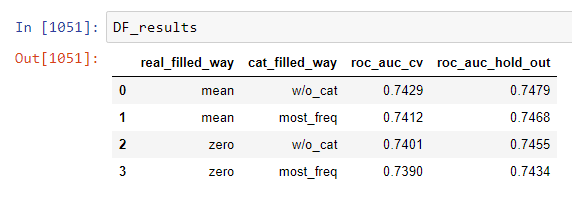

#### Работа с признаками - Кодирование категориальных признаков

Пробовались различные стратегии обработки категориальных признаков:

1) one-hot encoding через DictVectorizer (sklearn.feature_extraction)

2) one-hot encoding через OneHotEncoder (sklearn.preprocessing)

3) one-hot encoding через get_dummies (pandas)

4) Хэширование признаков через FeatureHasher (sklearn.feature_extraction)

5) Частотное кодирование

#### Вариант 1:

Если не проводить предварительный отбор категориальных признаков (перед кодированием), то первые 4 метода генерируют из 38 категориальных (ненулевых) признаков - очень сильно разряженную матрицу из 0 и 1:

Методы one-hot encoding - генерирует 63513 новых признаков, это суммарное число уникальных категорий для категориальных признаков,

FeatureHasher , при задании n_features = количеству кникальных значений - также будет генерировать разряженую матрицу высокой размерности.

С такой матрицей работать можно (используется формат Compressed Sparse Row format), но это значительно усложняет нашу модель.

Поэтому, частотное кодирование в данном случае является предпочтительным, при котором количество категориальных признаков после кодирования сохраняется.

#### Вариант 2:

Если проводить отбор категориальных признаков по степени корреляции с целевой переменной (данный отбор можно проводился с помощью определенной ранее функции - V_Krammer_func), то можно выдлить только 15 категориальных признаков, для которых присутствует статистически значимая взаимосвязь с целевой переменной на уровне значимости 0.05.

В данном случае первые 4 метода генерирует из 15 признаков 194 новых признака.

Если для 15 признаков сравнивать различные способы кодирования, то наилучший результат из всех показывает one-hot encoding через DictVectorizer, но при этом качество модели падает, относительно качества без отбора признаков с частотным кодированием.

В работе использовалось - частотное кодирование. Кодирование осуществляется с помощью спец. функции cat_to_real_encode(X_cat_filled,'freq')

Ниже для демонстрации приведены способы оценки размерности матрицы, получаемой при использовании первых четырех методов без непосредственной реализации всех методов.

In [69]:
#размерность разряженной матрицы для 4 методов без предварительного отбора
X_cat_filled.apply(lambda x: x.nunique()).sum()

63513

In [70]:
#размерность разряженой матрицы для 4 методов после отбора по степени корреляции
V_Krammer_list=[]
p_value_list=[]
condition_of_using_list=[]
for i in range(len(X_cat_filled.columns)):
    table=pd.crosstab(X_cat_filled.iloc[:,i], data_merge.labels)
    V_Krammer_k, p_value_k, condition_of_using=V_Krammer_func(table)
    V_Krammer_list.append(V_Krammer_k.round(4))
    p_value_list.append(p_value_k)
    condition_of_using_list.append(condition_of_using)

CATEG_COR=pd.DataFrame({'V_Krammer':V_Krammer_list,"p_value":p_value_list,
                       "condition_of_using":condition_of_using_list},
                       index=X_cat_filled.columns)
CATEG_COR2=CATEG_COR[(CATEG_COR.condition_of_using=='Ok') &
                     (CATEG_COR.p_value<0.05)].sort_values('V_Krammer',ascending=False)

X_cat_top=X_cat_filled[CATEG_COR2.index]

X_cat_top.apply(lambda x: x.nunique()).sum()

194

#### Работа с признаками - отбор признаков

Пробовались различные стратегии отбора признаков:

Ниже приведены результаты в виде графиков, на которых отображена зависимость roc_auc метрики на кросс-валидации и отложенной выборке в зависимости от числа используемых признаков.
    
1) VarianceThreshold from sklearn.feature_selection

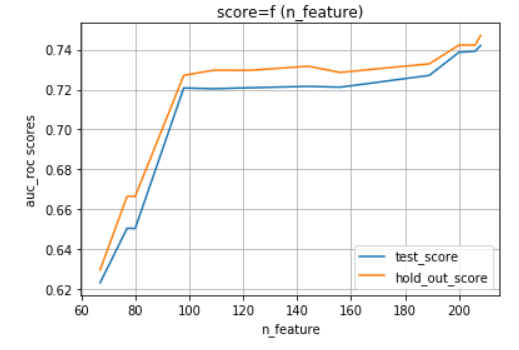

Данный подход показывает снижение качества при увеличении числа отобранных признаков. Это обусловлено тем, что признаки с небольшой дисперсией могут иметь весомое значение для построения модели.

2) Отбор с помощью LogisticRegression с l1 через SelectFromModel

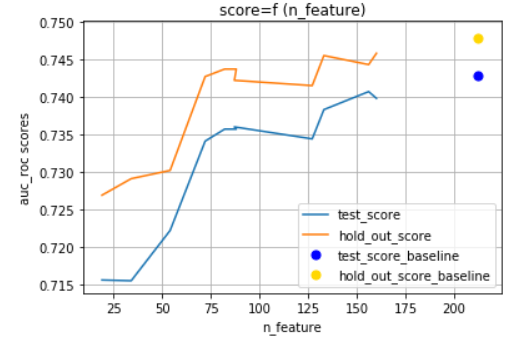

Отбор с помощью LogisticRegression с l1 с последующим построением модели XGBClassifier на отобранных признаках приводит к снижению качества относительно baseline.

3) Отбор с помощью LinearSVC с l1 через SelectFromModel

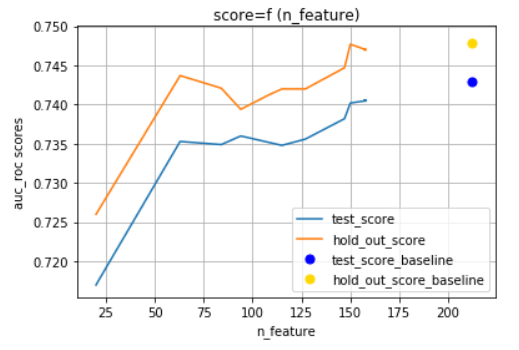

Отбор с помощью LinearSVC с l1 с последующим построением модели XGBClassifier на отобранных признаках приводит к снижению качества относительно baseline.

4) Отбираем только вещественные по степени корреляции с целевой переменной

В определенной ранее функции hold_out_train при регулировке порога, мы делаем отбор для вещественных признаков.

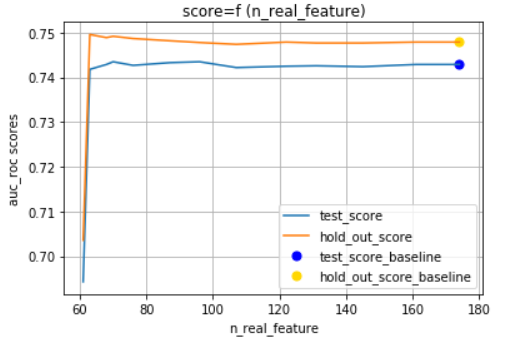
   
Можно наблдать, что снижение числа вещестенных признаков со 174 до 70 почти не меняет качетсво нашей модели.

Для 63 признаков наблюдаем некоторое снижение качества на CV, и увеличение качества на hold-out датасете.

Для 70 признаков наблюдаем повышение качества как на CV,так и на hold_out датасете.

Опираться на данный отбор не следует, т.к. сам способ определения корреляции между вещественными и категориальными признаками является довольно грубым и не подвергается оценке уровня статистической значимости данного результата, но , как минимум, мы видим, что не все вещественные признаки являются важными для нашей модели.

5) Отбираем только вещественные по степени пропущенных значений

Оригинальные данные представляют собой очень разряженное признаковое пространство.

16 полностью нулевых признаков

147 признаков, для которых имеется не больше 2000 заполненных значений !!! т.е. заполнены не больше 5% объектов

35 признаков, для которых имеется не меньше 87,5% 

3 признака, для которых имеется 100% заполненных значений

Ранее мы определили функцию get_X_real_mean, которая отбирает вещественные признаки в зависимости от доли пропущенных значений

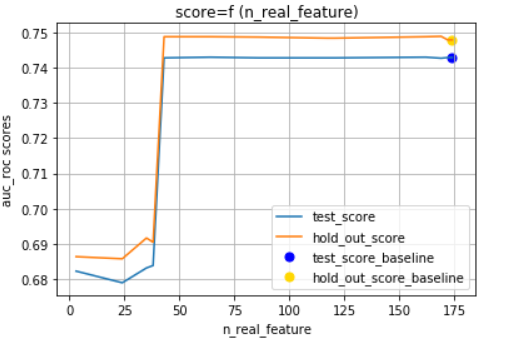
 
Отбор вещественных признаков позволяет увеличить качество или как минимум сохранить качество baseline модели:
    
Для 162 признаков (удалили 12 наиболее разряженных) наблюдаем увеличение качества как на CV так и на hold_out выборке.

Для 43 признаков (удалили 131, оставили 25% вещественных!) наблюдаем почти полное сохранение качества, относительно качества baseline модели. (на СV - на 1/10 000 хуже, на hold_out - на 1/10 000 лучше)

Удаление сильно разряженных признаков почти не влияет на качество модели.

К сожалению, фиксация лучшего результата для отбора вещественных признаков и последующий отбор категориальных не приводит к увеличению качества. Пробовались различные стратегий для отбора категориальных признаков - по степени пропущенных значений, по уровню корреляции, по кол-ву подкатегорий для каждого признака(признаки с большим количеством уникальных значений).

Вероятнее всего это обусловлено тем, что при данном отборе не учитывается взаимная важность некоторых комбинаций категориальных и вещественных признаков для модели.

6) Делаем отбор признаков с помощью ExtraTreesClassifier

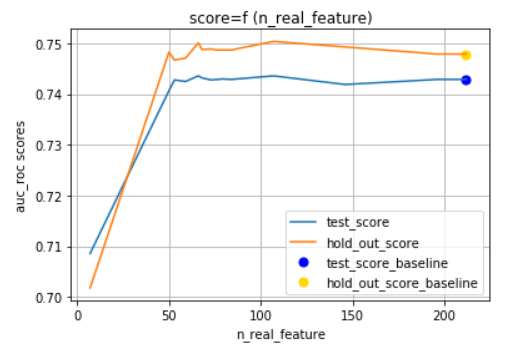

Для 107 признаков, качество на CV увеличивается (принимает max - значение), на hold_out - увеличивается, относительно baseline модели.

Для 66 признаков, качество на CV увеличивается (принимает max - значение), на hold_out увеличивается.

Отбор признаков с помощью ExtraTreesClassifier позволяет увеличить качество модели на CV, но при этом качество на отложенной выборке сохраняется.

Наилучший вариант - отбор с помощью ExtraTreesClassifier.

#### 3.4 Подбор оптимальных параметров классификатора 

В ходе выолнения работы были построены две модели на основе data_merge датасета, для каждой из которых были подобраны оптимальные параметры с помощью RandomizedSearchCV и GridSearchCV.

Ниже приведены полученные результаты.

In [78]:
DF_result=pd.DataFrame({'bsline_data':['data_merge','data_merge'],
                        'bsline_score_CV':[0.7429,0.7429],
                        'bsline_score_HO':[0.7479,0.7479],
                        'smpls_resampled':['ALLKNN (mode)','ALLKNN (mode)'],
                        'ftrs_extracted':['ExtraTC (60 features)','ExtraTC (60 features)'],
                        'score_CV':[0.7465,0.7465],
                        'score_HO':[0.7491,0.7491],
                        'GrSrch_CV':[0.7469,0.7494],
                        'GrSrch_HO':[0.7507,0.7473],
                        'GrSrch_HO_Kaggle': [0.72068,0.72246]},
                      index=['model_1','model_2'])
DF_result

,bsline_data,bsline_score_CV,bsline_score_HO,smpls_resampled,ftrs_extracted,score_CV,score_HO,GrSrch_CV,GrSrch_HO,GrSrch_HO_Kaggle
model_1,data_merge,0.7429,0.7479,ALLKNN (mode),ExtraTC (60 features),0.7465,0.7491,0.7469,0.7507,0.72068
model_2,data_merge,0.7429,0.7479,ALLKNN (mode),ExtraTC (60 features),0.7465,0.7491,0.7494,0.7473,0.72246


Лушая модель была построена на основе X_DATA датасета, ниже приведен поэтапный процесс построения модели и подбора оптимальных параметров.

- baseline-модель (X_DATA датасет)
- Делаем отбор объектов c помощью ALLKNN kind_sel='mode'
- Делаем отбор признаков с помощью ExtraTreesClassifier, подбираем оптимальный порог так, чтобы получилось максимальное качество на CV

In [83]:
%%time
# baseline-модель (X_DATA датасет)

#кодирование категориальных признаков
X_cat_filled=X_DATA[categ_features_not_null].fillna('w/o_cat')
X_cat=cat_to_real_encode(X_cat_filled,'freq')
print(X_cat.shape,X_cat.shape[1],'- категориальных признаков')
#отбор вещественных признаков
X_real_mean=get_X_real_mean(X_DATA,1)
print(X_real_mean.shape,X_real_mean.shape[1],'- вещественных признаков')
#метки
y=y_train_orig.labels

n_folds=5
random=0

X, HOLD = hold_out_train_new(X_real_mean,X_cat,y)

# Делаем отбор объектов c помощью ALLKNN kind_sel='mode'
allknn = AllKNN(kind_sel='mode')
X_resampled, y_resampled = allknn.fit_resample(X, y)
print(X_resampled.shape)
print(y_resampled.shape)

#Делаем отбор признаков с помощью ExtraTreesClassifier

clf=ExtraTreesClassifier(random_state=random)
clf.fit(X_resampled,y_resampled)

feature_importances=clf.feature_importances_
FI=pd.DataFrame({'features':list(X),'feature_importance':feature_importances})

#определили оптимальный порог 0.0005101412048828447, при котором отбираем 82 признака
best_features=list(FI[FI.feature_importance>= 0.0005101412048828447 ].features)

#строим лучшую модель до отбора признаков (передаем признака классификатора по умолчанию)
param_grid={'base_score': [0.5],
         'booster': ['gbtree'],
         'colsample_bylevel': [1],
         'colsample_bynode': [1],
         'colsample_bytree': [1],
         'gamma': [0],
         'learning_rate': [0.1],
         'max_delta_step': [0],
         'max_depth': [3],
         'min_child_weight': [1],
         'missing': [None],
         'n_estimators': [100],
         'nthread': [1],
         'objective': ['binary:logistic'],
         'random_state': [0],
         'reg_alpha': [0],
         'reg_lambda': [1],
         'scale_pos_weight': [1],
         'silent': [None],
         'seed': [0],
         'subsample': [1],
         'verbosity': [1]}


stat = StratifiedKFold(n_splits=n_folds,shuffle=True,random_state=random)
clf=xgb.XGBClassifier(random_state=random)

grid_searcher=GridSearchCV(clf,param_grid,n_jobs=-1,cv=stat,scoring='roc_auc')

print('используем {} признаков после отбора'.format(len(best_features)))

grid_searcher.fit(X_resampled[best_features],y_resampled)

print ('Метрика auc_roc по кросс-валидации для {} фолдов - {}'.format(n_folds,grid_searcher.best_score_.round(4)))

(50000, 38) 38 - категориальных признаков
(50000, 174) 174 - вещественных признаков
(36976, 212)
(36976,)
используем 82 признаков после отбора
Метрика auc_roc по кросс-валидации для 5 фолдов - 0.7486
Wall time: 2min 41s


Подбор параметров по сетке:
    
- Делаем грубую прикидку по RandomizedSearchCV

In [85]:
%%time
seed=np.random.seed(0)
param_grid={'base_score': [0.4,0.5],
         'booster': ['gbtree'],
         'colsample_bylevel': [1],
         'colsample_bynode': [1],
         'colsample_bytree': [0.5,0.7,0.9,1],
         'gamma': [0,1,2,3,5,7],
         'learning_rate': [0.03,0.05,0.07,0.08],
         'max_delta_step': [0],
         'max_depth': [3,4,5,6],
         'min_child_weight': [1,2,3,5,7,9,12],
         'missing': [None],
         'n_estimators': range(140,220,10),
         'nthread': [1],
         'objective': ['binary:logistic'],
         'random_state': [0],
         'reg_alpha': [0],
         'reg_lambda': [1],
         'scale_pos_weight': [1],
         'silent': [None],
         'seed': [0],
         'subsample': [0.5,0.6,0.7,0.8,0.9,1],
         'verbosity': [1]}


stat = StratifiedKFold(n_splits=n_folds,shuffle=True,random_state=random)
clf=xgb.XGBClassifier(random_state=random)

grid_searcher=RandomizedSearchCV(clf,param_grid,n_jobs=-1,cv=stat,scoring='roc_auc')

best_features=list(FI[FI.feature_importance>= 0.0005101412048828447 ].features)

print('используем {} признаков после отбора'.format(len(best_features)))

grid_searcher.fit(X_resampled[best_features],y_resampled)

print ('Метрика auc_roc по кросс-валидации для {} фолдов - {}'.format(n_folds,grid_searcher.best_score_.round(4)))


используем 82 признаков после отбора
Метрика auc_roc по кросс-валидации для 5 фолдов - 0.7509
Wall time: 2min 35s


Качество модели удалось поднять, пробуем дополнительно увеличить качество путем полного перебора некоторых парамтеров с помощью 
GridSearchCV

- фиксируем все параметры и меняем 'subsample'

Качество удалось увеличить('subsample': 0.8)

- делаем следующую попытку - меняем 'gamma'.

Качество удалось увеличить('subsample': 0.8,'gamma': 1)

- далее делаем следующую попытку - меняем 'n_estimators'

Качество удалось увеличить('subsample': 0.8,'gamma': 1,'n_estimators':180)

- делаем следующую попытку - меняем 'gamma' , 'max_depth', и 'learning_rate'

Качество вновь удалось увеличить

- фиксирем параметры лучшей модели

#### 3.5 Получаем предсказания для  тестового датасета с kaggle

In [86]:
%%time
seed=np.random.seed(0)

param_grid={'base_score': [0.5],
         'booster': ['gbtree'],
         'colsample_bylevel': [1],
         'colsample_bynode': [1],
         'colsample_bytree': [0.5],
         'gamma': [0.5],
         'learning_rate': [0.04],
         'max_delta_step': [0],
         'max_depth': [5],
         'min_child_weight': [3],
         'missing': [None],
         'n_estimators': [180],
         'nthread': [1],
         'objective': ['binary:logistic'],
         'random_state': [0],
         'reg_alpha': [0],
         'reg_lambda': [1],
         'scale_pos_weight': [1],
         'silent': [None],
         'seed': [0],
         'subsample': [0.8],
         'verbosity': [1]}

stat = StratifiedKFold(n_splits=n_folds,shuffle=True,random_state=random)
clf=xgb.XGBClassifier(random_state=random)

grid_searcher=GridSearchCV(clf,param_grid,n_jobs=-1,cv=stat,scoring='roc_auc')

best_features=list(FI[FI.feature_importance>= 0.0005101412048828447 ].features)

print('используем {} признаков после отбора'.format(len(best_features)))

grid_searcher.fit(X_resampled[best_features],y_resampled)

print ('Метрика auc_roc по кросс-валидации для {} фолдов - {}'.format(n_folds,grid_searcher.best_score_.round(4)))

predictions=grid_searcher.best_estimator_.predict_proba(HOLD[best_features])[:,1]


output = pd.DataFrame({'ID': X_test_orig.index, 'result': predictions})
output.to_csv('BEST_last.csv', index=False)
print("Your submission was successfully saved!")

используем 82 признаков после отбора
Метрика auc_roc по кросс-валидации для 5 фолдов - 0.7528
Your submission was successfully saved!
Wall time: 26.1 s


#### 3.6 Финальные результаты для построенных моделей

In [87]:
DF_result.loc['model_3']=['X_DATA',0.7445,'-','ALLKNN (mode)','ExtraTC (82 features)',
                  0.7486,'-',0.7528,'-',0.72370]
DF_result

,bsline_data,bsline_score_CV,bsline_score_HO,smpls_resampled,ftrs_extracted,score_CV,score_HO,GrSrch_CV,GrSrch_HO,GrSrch_HO_Kaggle
model_1,data_merge,0.7429,0.7479,ALLKNN (mode),ExtraTC (60 features),0.7465,0.7491,0.7469,0.7507,0.72068
model_2,data_merge,0.7429,0.7479,ALLKNN (mode),ExtraTC (60 features),0.7465,0.7491,0.7494,0.7473,0.72246
model_3,X_DATA,0.7445,-,ALLKNN (mode),ExtraTC (82 features),0.7486,-,0.7528,-,0.72370


Лучшая модель - model_3, на сайте Kaggle получили значение метрики для тестового набора - 0.72370, что на 12.02.2020 является 7 результатом из 75. Разница с 3 местом составляет 3 тысячных.

https://www.kaggle.com/c/telecom-clients-prediction2/leaderboard

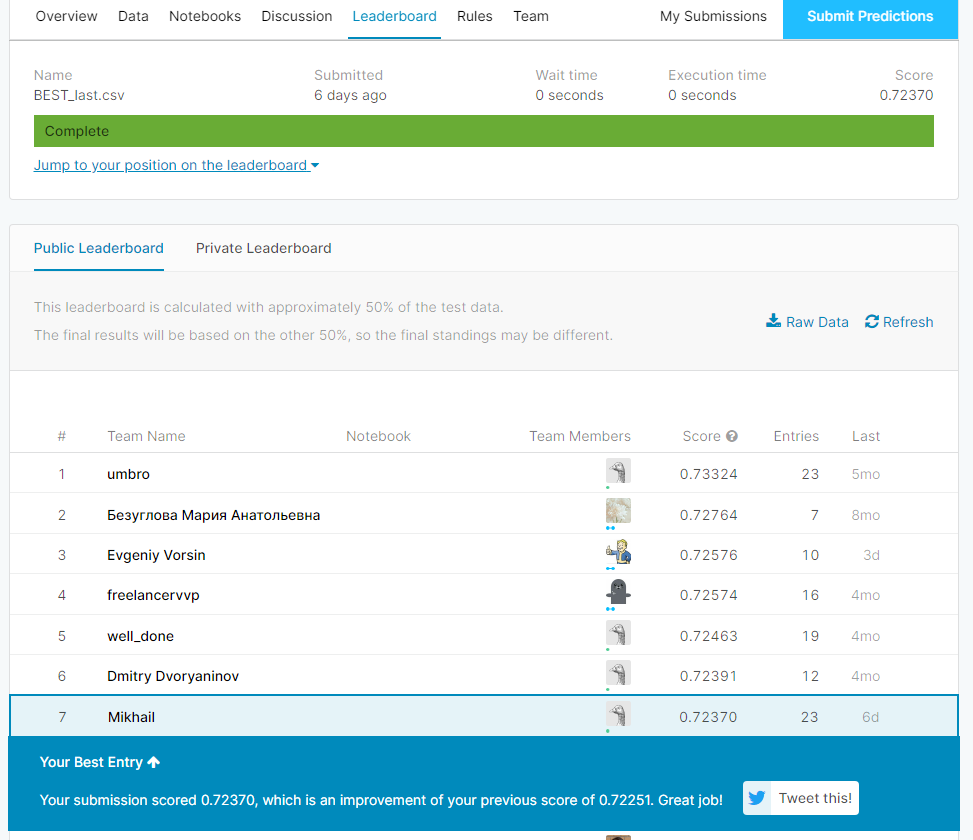

#### 4  Анализ качества и оценка экономического эффекта от внедрения модели
#### 4.1  Анализ качества для построенной модели

- лучшее качество на тестовой выборке с kaggle показала model_3, обученная на X_DATA датасете (на всем объеме тренировочного датасета)

- полученное значение roc_auc метрики на тестовой выборке - 0.72370 на 0.28% хуже 3-го места и на 1.32% хуже 1-го места

- т.к. у нас отсутствуют реальные ответы на тестовом датасете, то более подробный анализ качества в данном случае получить сложно

- возьмем model_2, которая обучалась на data_merge датасете (т.е. data_merge делился на тренировочную и отложенную выборки, и следовательно итоговое качество измерялось как на отложенной выборке, так и на тестовой с Kaggle)

- итоговое качество на тесте для model_2 - 0.72246, что на 0.17% хуже нашей лучшей модели (model_3)

- проведем детальный анализ качества модели model_2 по результатам на отложенной выборке

#### анализируемая модель - model_2

In [121]:
%%time
#кодирование категориальных признаков
X_cat_filled=data_merge[categ_features_not_null].fillna('w/o_cat')
X_cat=cat_to_real_encode(X_cat_filled,'freq')
print(X_cat.shape,X_cat.shape[1],'- категориальных признаков')
#отбор вещественных признаков
X_real_mean=get_X_real_mean(data_merge.drop('labels',axis=1),1)
print(X_real_mean.shape,X_real_mean.shape[1],'- вещественных признаков')
#метки
y=y_train_orig.labels

n_folds=5
random=0

TRAIN, HOLD = hold_out_train(X_real_mean,X_cat,y)

#тренировочный датасет разбиваем на матрицу объектов-признаков и вектор меток, данные используем непосредствеено в DF-ах
X=TRAIN.drop('labels',axis=1)
y=TRAIN['labels']

X_validation=HOLD.drop('labels',axis=1)
y_validation=HOLD['labels']

#### Делаем отбор объектов c помощью ALLKNN kind_sel='mode'

allknn = AllKNN(kind_sel='mode')
X_resampled, y_resampled = allknn.fit_resample(X, y)
print(X_resampled.shape)
print(y_resampled.shape)

#### Делаем отбор признаков с помощью ExtraTreesClassifier

clf=ExtraTreesClassifier(random_state=random)
clf.fit(X_resampled,y_resampled)

feature_importances=clf.feature_importances_
FI=pd.DataFrame({'features':list(X),'feature_importance':feature_importances})
FI.sort_values('feature_importance',ascending=True).head()

#### model_2

seed=np.random.seed(0)
param_grid={'base_score': [0.5],
         'booster': ['gbtree'],
         'colsample_bylevel': [1],
         'colsample_bynode': [1],
         'colsample_bytree': [0.5],
         'gamma': [5],
         'learning_rate': [0.055],
         'max_delta_step': [0],
         'max_depth': [4],
         'min_child_weight': [2],
         'missing': [None],
         'n_estimators': [130],
         'nthread': [1],
         'objective': ['binary:logistic'],
         'random_state': [0],
         'reg_alpha': [0],
         'reg_lambda': [1],
         'scale_pos_weight': [1],
         'silent': [None],
         'seed': [0],
         'subsample': [0.8],
         'verbosity': [1]}

stat = StratifiedKFold(n_splits=n_folds,shuffle=True,random_state=random)
clf=xgb.XGBClassifier(random_state=random)

grid_searcher=GridSearchCV(clf,param_grid,n_jobs=-1,cv=stat,scoring='roc_auc')

best_features=list(FI[FI.feature_importance>= 0.006184305460633972 ].features)

print('используем {} признаков после отбора'.format(len(best_features)))

grid_searcher.fit(X_resampled[best_features],y_resampled)

print ('Метрика auc_roc по кросс-валидации для {} фолдов - {}'.format(n_folds,grid_searcher.best_score_.round(4)))

prediction=grid_searcher.best_estimator_.predict_proba(X_validation[best_features])[:,1]

print ('Метрика auc_roc на hold_out выборке (финальная оценка) - {}'.format(roc_auc_score(y_validation,prediction).round(4)))

(40000, 38) 38 - категориальных признаков
(40000, 174) 174 - вещественных признаков
(29532, 212)
(29532,)
используем 60 признаков после отбора
Метрика auc_roc по кросс-валидации для 5 фолдов - 0.7494
Метрика auc_roc на hold_out выборке (финальная оценка) - 0.7473
Wall time: 2min 5s


На выходе нашей модели имеем:

- вероятность отнесения к классу
- предсказанный класс (с базовым порогом 0.5)
- реальный класс, на котором проводили валидацию модели (метки из hold_out выборки)

Создаем DF с реузльтатами классификации model_2 (предсказанные класс, соответствующая вероятность и реальный класс) и рассмотрим динамику изменения различных ошибок классификации

In [124]:
#вероятность отнесения к классу
predicted_prob=grid_searcher.best_estimator_.predict_proba(X_validation[best_features])[:,1]
print(predicted_prob.shape)

#вероятностный класс (с базовым порогом 0.5)
predicted_class=grid_searcher.best_estimator_.predict(X_validation[best_features])
print(predicted_class.shape)

#реальный класс, на котором проводили валидацию модели (метки из hold_out выборки)
print(y_validation.shape)

DF_model_res=pd.DataFrame({'predicted_prob':predicted_prob,
                                 'predicted_class':predicted_class,
                                 'true_class':y_validation})

#перебираем различные значения порога классификации и смотрим динамику изменения различных ошибок
TP_list=[]
FN_list=[]
FP_list=[]
threshold_list=[0.05,0.1,0.2,0.3,0.4,0.5]

for threshold in threshold_list:
    TP,FN,FP, _ = mistakes_balance_tuning(DF_model_res,threshold)
    TP_list.append(TP)
    FN_list.append(FN)
    FP_list.append(FP)

(8000,)
(8000,)
(8000,)
TP (верно определенные клиенты из класса "отток") =  523
FN (ложные пропуски клиентов из класса "отток") =  72
FP (ложные срабатывания - неверное отнесение клиента к классу "отток") =  4399
Precision =  0.106
Recall =  0.879
roc_auc =  0.747
общее число клиентов в валидационной выборке =  8000
TP (верно определенные клиенты из класса "отток") =  331
FN (ложные пропуски клиентов из класса "отток") =  264
FP (ложные срабатывания - неверное отнесение клиента к классу "отток") =  1604
Precision =  0.171
Recall =  0.556
roc_auc =  0.747
общее число клиентов в валидационной выборке =  8000
TP (верно определенные клиенты из класса "отток") =  135
FN (ложные пропуски клиентов из класса "отток") =  460
FP (ложные срабатывания - неверное отнесение клиента к классу "отток") =  355
Precision =  0.276
Recall =  0.227
roc_auc =  0.747
общее число клиентов в валидационной выборке =  8000
TP (верно определенные клиенты из класса "отток") =  74
FN (ложные пропуски клиентов из кл

Визуализируем результаты

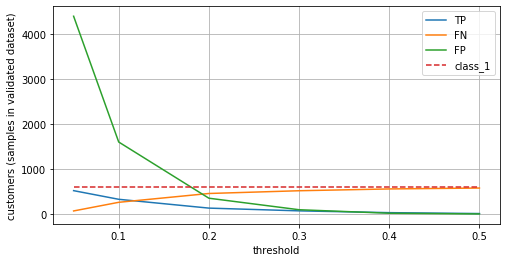

In [132]:
plt.figure(figsize=(8,4))
plt.plot(threshold_list,TP_list)
plt.plot(threshold_list,FN_list)
plt.plot(threshold_list,FP_list)
plt.plot(threshold_list,[y_validation.sum()]*6,linestyle = '--')
plt.legend(['TP','FN','FP','class_1'])
plt.xlabel('threshold')
plt.ylabel('customers (samples in validated dataset)')
plt.grid()

Рассмотрим значения в точке (с порогом = 0.2)

In [128]:
TP,FN,FP, DF_res = mistakes_balance_tuning(DF_model_res,0.2)

TP (верно определенные клиенты из класса "отток") =  135
FN (ложные пропуски клиентов из класса "отток") =  460
FP (ложные срабатывания - неверное отнесение клиента к классу "отток") =  355
Precision =  0.276
Recall =  0.227
roc_auc =  0.747
общее число клиентов в валидационной выборке =  8000


Можно наблюдать, что в завимисоти от выбранного порога классификации, наблюдается различное соотношение ошибок нашей модели.

Для порога равного 0.2 наша модель выдает следующие результаты:

- всего клиентов из класса отток - 595
- верно определенные клиенты из класса "отток" -  135
- ложные пропуски клиентов из класса "отток" - 460
- ложные срабатывания - неверное отнесение клиента к классу "отток" - 355
- объем класса отток , предсказанный моделью - 490

Насколько данная модель может быть полезной в бизнесе, и насколько высока/низка ее предсказательная способность для бизнеса можно определить только задав некторые вводные параметры, для которых можно подобрать оптимальный порог классификации (баланс между видами ошибок), при котором наша модель будет демонстрировать наилучшую эффективность.

#### 4.2  Оценка ожидаемого экономического эффекта от внедрения построенной модели в бизнесе

Пусть:

- один пользователь в среднем в месяц приносит - 100 у.е.
- для удержания одного пользователя в среднем в месяц будем выделять - 10 у.е.
- вероятность того, что пользователь лоялен к спец. предложениям - 50 %
- из клиентов склонных к оттоку будем работать с топ - 25 %

У нас имеется всего 8000 пользователей в текущем месяце

#### Сценарий 1 - не применяем модель по прогнозированию оттока

- Потенциальная прибыль = 8000 * 100 = 800 000 у.е.
- Число пользователей попавших на конец месяца в группу отток (число 1 в векторе целевых признаков y_validation) - 595 человек
- Потерянная прибыль из-за оттока = 595 * 100 = 59 500 у.е.

#### Результат:

- Реальная прибыль = Потенциальная прибыль - Потерянная прибыль из-за оттока = 740 500 у.е

#### Сценарий 2 - применяем модель

- в качестве порога классификации использем 0.2
- из 595 человек мы определим верно 135 - 22 % (округляем вниз)
- также мы неверно определим в группу склонных к оттоку 355 человек 

т.е. наша модель выделит 490 человек из которых только 27% входят в класс отток

- работаем с Топ 25% из класса отток (определенного моделью)
- из 122 человек (топ 25%) действительно к 1ому классу относятся только 58 человек - 47%
- учтем, что лояльность пользователей к спец предложениям составляет 50%

т.е. из 122 человек - 64 не из класса отток, предполагаем, что неверно сделанное спец. предложение для них не переведет их в группу отток =)
следовательно, из 58 человек, только половина решит остаться - 29 человек.


- Потенциальная прибыль = 8000 * 100 = 800 000 у.е.
- Модель определяет 490 человек 1ого класса из которых мы работаес с Топ25 - 122 человека
- Расходы на удержание 10*122=1220 у.е
- Потерянная прибыль из-за оттока = (595-29) * 100  = 56 600 у.е.

#### Реузльтат:

- Реальная прибыль = Потенциальная прибыль - Потерянная прибыль из-за оттока - Расходы на удержание = 742 180 у.е

#### Итог:

- прибыль без модели - 740 500 у.е.
- прибыль с моделью - 742 180 у.е
- прирост прибыли с моделью +0.227% 

In [136]:
#ранее определили функцию, которая реализует данный расчет
mistakes_balance_tuning_and_final_estimation(DF_model_res,0.2)

0.227

Рассмотрим зависимость разницы в месечной доходности при различных уровнях порога.

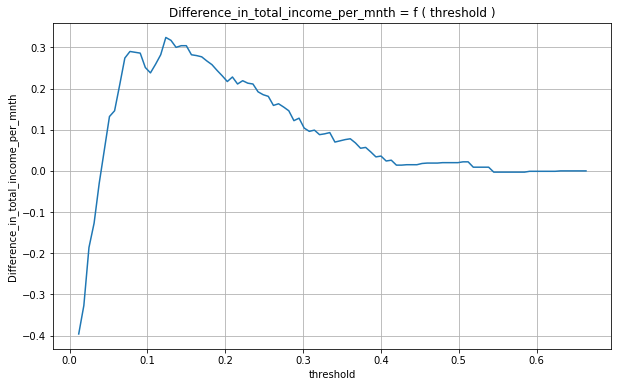

In [140]:
#максимальное значение порога, выше которого отсутствуют истинные значения класса отток 
# (TP=0, следовательно Recall и Precision = 0)

max_threshold=DF_model_res[DF_model_res.true_class==1].predicted_prob.max()

#минимальное значение порога, ниже которого отсутствуют истинные значения класса отток 
# (TP=595 - все истинные значения определены, следовательно Recall =  1)

min_threshold=DF_model_res[DF_model_res.true_class==1].predicted_prob.min()

result_list=[]

threshold_list=np.linspace(min_threshold,max_threshold,100)

for threshold in threshold_list:
    #print('\nпорог = ',threshold)
    diff = mistakes_balance_tuning_and_final_estimation(DF_model_res,threshold)
    result_list.append(diff)

plt.figure(figsize=(10,6))
plt.plot(threshold_list,result_list)
plt.xlabel('threshold')
plt.ylabel('Difference_in_total_income_per_mnth')
plt.title('Difference_in_total_income_per_mnth = f ( threshold )')
plt.grid()

#### Наилучший итог от применения модели

In [145]:
#максимальное значение
#print(max(result_list))

#индекс максимального значения
max_index=np.where(result_list==(max(result_list)))[0][0]

#соответствующий порог
#print(round(threshold_list[max_index],3))

mistakes_balance_tuning_and_final_estimation(DF_model_res,threshold_list[max_index])

TP (верно определенные клиенты из класса "отток") =  278
FN (ложные пропуски клиентов из класса "отток") =  317
FP (ложные срабатывания - неверное отнесение клиента к классу "отток") =  1083
Precision =  0.204
Recall =  0.467
roc_auc =  0.747
реальный объем класса отток  595
класс отток, определяемый моделью  1361
% дучших от класса отток  340
число людей действительно относящихся к классу отток из исследуемых  115
число людей, лояльных к предложению  58.0
прибыль без модели =  740500
затраты на удержание =  3400
прибыль от сохраненных клиентов  5800.0
прибыль с моделью =  742900.0
разница в итоговой прибыли после применения модели  0.32


0.324

#### Вывод:
    
При ранее определенных начальных условиях в зависимости от выбираемого порога наша модель может как увеличивать, так и уменьшать месячную доходность.

Максимальное значение достигается при пороге 0.124, которому соответствует увеличение доходности на 0.32%, относительно номинальной доходности без использования модели.

Минимальное значение соответствует порогу классификации 0.012, для которого эффект от применения модели начинает носить отицательный характер. (наблюдается  снижение доходности на 0.39%)


#### +0.32% это много или мало ???

В нашем эксперименте для оценки экономическо эффективности размер выборки , для которой делался прогноз - 8000 человек (отложенная выборка , полученная при разбиении 40 000 шт на 5 фолдов)

Если опираться на введные параметры:

- один пользователь в среднем в месяц приносит - 100 у.е.
- для удержания одного пользователя в среднем в месяц будем выделять - 10 у.е.
- вероятность того, что пользователь лоялен к спец. предложениям - 50 %
- из клиентов склонных к оттоку будем работать с топ - 25 %

То мы получаем прирост +0.32% или ≈ 2 400 у.е.

если увеличим объем выборки на порядок с сохранением баласна между классами, т.е. делаем прогноз для 80 000 клиентов, то прирост в месячной доходности увелчится на порядок и будет составлять ≈ 24 000 у.е.

если увеличим объем выборки еще на порядок с сохранением баласна между классами, т.е. делаем прогноз для 800 000 клиентов, то прирост в месячной доходности увелчится на порядок и будет составлять ≈ 240 000 у.е.

В реальности объем клиентской базы телеком оператора - 10-ки или 100-и миллионов человек, следовательно, даже небольшой процент прироста прибыли может быть значимым, и, как следствие, применение модели машинного обучения может быть экономически целесообразно.

#### 5. Итог работы

В результате выполнения финального проекта удалось:
    
- на практике применить знания и навыки, полученные в рамках специализации
- построить модель машинного обучения, которая предсказывает вероятность отнесения клиента мобильного оператора к классу 'отток'
- получить точность предсказания по метрике roc_auc - 0.72370, которая находится на 7 месте в общем рейтинге (из 75) и отстает от 3 места на 0.28% и на 1.32% хуже 1-го места
- оценить потенциальный экономический эффект от применения модели в бизнесе